In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
df_Traveldata_train = pd.read_csv("Traveldata_train.csv")
df_Traveldata_train.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0


In [3]:
df_Surveydata_train = pd.read_csv("Surveydata_train.csv")
df_Surveydata_train.head()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good


### Travel data for Training

In [4]:
df_Traveldata_train.shape

(94379, 9)

In [5]:
df_Traveldata_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
ID                        94379 non-null int64
Gender                    94302 non-null object
CustomerType              85428 non-null object
Age                       94346 non-null float64
TypeTravel                85153 non-null object
Travel_Class              94379 non-null object
Travel_Distance           94379 non-null int64
DepartureDelay_in_Mins    94322 non-null float64
ArrivalDelay_in_Mins      94022 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [6]:
df_Traveldata_train.describe()

,ID,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
count,9.437900e+04,94346.000000,94379.000000,94322.000000,94022.000000
mean,9.884719e+07,39.419647,1978.888185,14.647092,15.005222
std,2.724501e+04,15.116632,1027.961019,38.138781,38.439409
min,9.880000e+07,7.000000,50.000000,0.000000,0.000000
25%,9.882360e+07,27.000000,1359.000000,0.000000,0.000000
50%,9.884719e+07,40.000000,1923.000000,0.000000,0.000000
75%,9.887078e+07,51.000000,2538.000000,12.000000,13.000000
max,9.889438e+07,85.000000,6951.000000,1592.000000,1584.000000


In [7]:
df_Traveldata_train.isnull().sum()

ID                           0
Gender                      77
CustomerType              8951
Age                         33
TypeTravel                9226
Travel_Class                 0
Travel_Distance              0
DepartureDelay_in_Mins      57
ArrivalDelay_in_Mins       357
dtype: int64

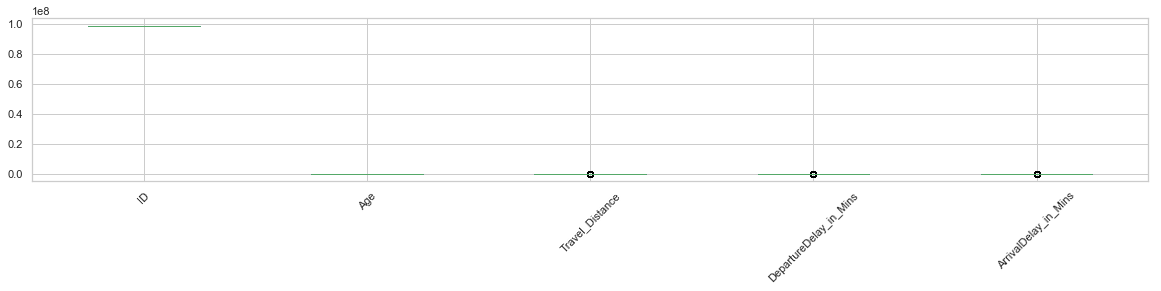

In [8]:
df_Traveldata_train.boxplot(figsize=(20,3))
plt.xticks(rotation=45)
plt.show()

In [9]:
for column in df_Traveldata_train.columns:
    if df_Traveldata_train[column].dtype != 'object':
        mean = df_Traveldata_train[column].mean()
        df_Traveldata_train[column] = df_Traveldata_train[column].fillna(mean)    
        
df_Traveldata_train.isnull().sum() 

ID                           0
Gender                      77
CustomerType              8951
Age                          0
TypeTravel                9226
Travel_Class                 0
Travel_Distance              0
DepartureDelay_in_Mins       0
ArrivalDelay_in_Mins         0
dtype: int64

In [10]:
for column in df_Traveldata_train:
    if df_Traveldata_train[column].dtype == 'object':
        if df_Traveldata_train[column].isnull().any():
#             if(column in cateogry_columns):
                df_Traveldata_train[column]=df_Traveldata_train[column].fillna(df_Traveldata_train[column].mode()[0])

In [11]:
        
df_Traveldata_train.isnull().sum()

ID                        0
Gender                    0
CustomerType              0
Age                       0
TypeTravel                0
Travel_Class              0
Travel_Distance           0
DepartureDelay_in_Mins    0
ArrivalDelay_in_Mins      0
dtype: int64

In [12]:
df_Traveldata_train["Travel_Class"].replace(['Eco'],["Economy"],inplace=True )

In [13]:
for column in df_Traveldata_train.columns:
    if df_Traveldata_train[column].dtype == 'object':
        print(column.upper(),': ',df_Traveldata_train[column].nunique())
        print(df_Traveldata_train[column].value_counts().sort_values())
        print('\n')

GENDER :  2
Male      46487
Female    47892
Name: Gender, dtype: int64


CUSTOMERTYPE :  2
disloyal Customer    15605
Loyal Customer       78774
Name: CustomerType, dtype: int64


TYPETRAVEL :  2
Personal Travel    26536
Business travel    67843
Name: TypeTravel, dtype: int64


TRAVEL_CLASS :  2
Business    45037
Economy     49342
Name: Travel_Class, dtype: int64




### Survey data for training

In [14]:
df_Surveydata_train.shape

(94379, 17)

In [15]:
df_Surveydata_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
ID                         94379 non-null int64
Overall_Experience         94379 non-null int64
Seat_comfort               94318 non-null object
Seat_Class                 94379 non-null object
Arrival_time_convenient    85449 non-null object
Catering                   85638 non-null object
Platform_location          94349 non-null object
Onboardwifi_service        94349 non-null object
Onboard_entertainment      94361 non-null object
Online_support             94288 non-null object
Onlinebooking_Ease         94306 non-null object
Onboard_service            86778 non-null object
Leg_room                   94289 non-null object
Baggage_handling           94237 non-null object
Checkin_service            94302 non-null object
Cleanliness                94373 non-null object
Online_boarding            94373 non-null object
dtypes: int64(2), object(15)
memory usage: 12.2+ MB


In [16]:
df_Surveydata_train.describe()

,ID,Overall_Experience
count,9.437900e+04,94379.000000
mean,9.884719e+07,0.546658
std,2.724501e+04,0.497821
min,9.880000e+07,0.000000
25%,9.882360e+07,0.000000
50%,9.884719e+07,1.000000
75%,9.887078e+07,1.000000
max,9.889438e+07,1.000000


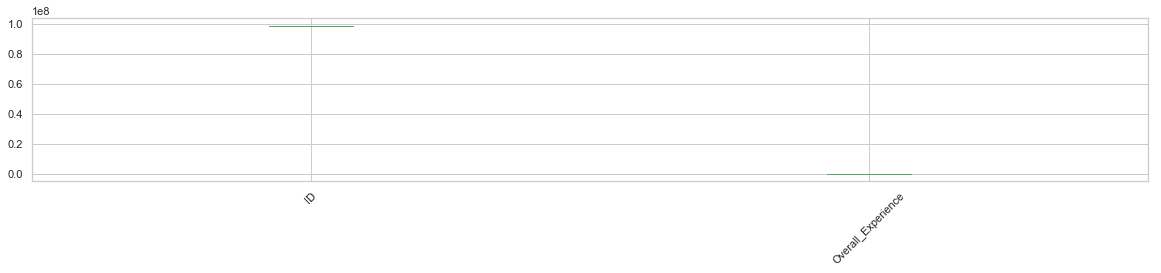

In [17]:
df_Surveydata_train.boxplot(figsize=(20,3))
plt.xticks(rotation=45)
plt.show()

In [18]:
for column in df_Surveydata_train.columns:
    if df_Surveydata_train[column].dtype != 'object':
        median = df_Surveydata_train[column].median()
        df_Surveydata_train[column] = df_Surveydata_train[column].fillna(median)    
        
df_Surveydata_train.isnull().sum() 

ID                            0
Overall_Experience            0
Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8930
Catering                   8741
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7601
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
dtype: int64

In [19]:
for column in df_Surveydata_train:
    if df_Surveydata_train[column].dtype == 'object':
        if df_Surveydata_train[column].isnull().any():
#             if(column in cateogry_columns):
                df_Surveydata_train[column]=df_Surveydata_train[column].fillna(df_Surveydata_train[column].mode()[0])

In [20]:
df_Surveydata_train.isnull().sum() 

ID                         0
Overall_Experience         0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
dtype: int64

In [21]:
df_Surveydata_train["Platform_location"].replace(['very inconvinient'],["Inconvinient"],inplace=True )
df_Surveydata_train["Online_support"].replace(['extremely poor'],["poor"],inplace=True )
df_Surveydata_train["Onboard_service"].replace(['extremely poor'],["poor"],inplace=True )
df_Surveydata_train["Checkin_service"].replace(['extremely poor'],["poor"],inplace=True )
df_Surveydata_train["Cleanliness"].replace(['extremely poor'],["poor"],inplace=True )

In [22]:
for column in df_Surveydata_train.columns:
    if df_Surveydata_train[column].dtype == 'object':
        print(column.upper(),': ',df_Surveydata_train[column].nunique())
        print(df_Surveydata_train[column].value_counts().sort_values())
        print('\n')

SEAT_COMFORT :  6
extremely poor       3463
excellent           12971
poor                15185
good                20595
need improvement    20946
acceptable          21219
Name: Seat_comfort, dtype: int64


SEAT_CLASS :  2
Ordinary     46944
Green Car    47435
Name: Seat_Class, dtype: int64


ARRIVAL_TIME_CONVENIENT :  6
extremely poor       4332
poor                13692
need improvement    14990
acceptable          15177
excellent           17684
good                28504
Name: Arrival_time_convenient, dtype: int64


CATERING :  6
extremely poor       3910
excellent           13455
poor                13858
good                17969
need improvement    17978
acceptable          27209
Name: Catering, dtype: int64


PLATFORM_LOCATION :  5
very convinient     13981
Inconvinient        16451
need improvement    17832
Convinient          21912
manageable          24203
Name: Platform_location, dtype: int64


ONBOARDWIFI_SERVICE :  6
extremely poor         91
poor                10741
ne

### Test data Loading and Data cleaning

### Travel data for test

In [23]:
df_Traveldata_test = pd.read_csv("Traveldata_test.csv")
df_Traveldata_test.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001,Female,NaN,36.0,Business travel,Business,532,0.0,0.0
1,99900002,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0
2,99900003,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0


In [24]:
df_Surveydata_test = pd.read_csv("Surveydata_test.csv")
df_Surveydata_test.head()

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,99900001,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor
1,99900002,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable
2,99900003,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent
3,99900004,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor
4,99900005,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent


In [25]:
df_Traveldata_test.shape

(35602, 9)

In [26]:
df_Traveldata_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 9 columns):
ID                        35602 non-null int64
Gender                    35572 non-null object
CustomerType              32219 non-null object
Age                       35591 non-null float64
TypeTravel                32154 non-null object
Travel_Class              35602 non-null object
Travel_Distance           35602 non-null int64
DepartureDelay_in_Mins    35573 non-null float64
ArrivalDelay_in_Mins      35479 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.4+ MB


In [27]:
df_Traveldata_test.describe()

,ID,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
count,3.560200e+04,35591.000000,35602.000000,35573.000000,35479.000000
mean,9.991780e+07,39.446995,1987.151761,14.880696,15.308802
std,1.027756e+04,15.137554,1024.308863,37.895453,38.531293
min,9.990000e+07,7.000000,50.000000,0.000000,0.000000
25%,9.990890e+07,27.000000,1360.000000,0.000000,0.000000
50%,9.991780e+07,40.000000,1929.000000,0.000000,0.000000
75%,9.992670e+07,51.000000,2559.000000,13.000000,13.000000
max,9.993560e+07,85.000000,6868.000000,978.000000,970.000000


In [28]:
df_Traveldata_test.isnull().sum()

ID                           0
Gender                      30
CustomerType              3383
Age                         11
TypeTravel                3448
Travel_Class                 0
Travel_Distance              0
DepartureDelay_in_Mins      29
ArrivalDelay_in_Mins       123
dtype: int64

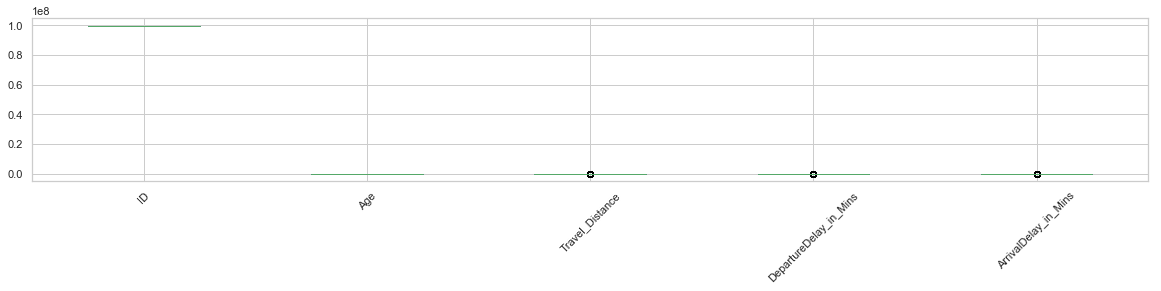

In [29]:
df_Traveldata_test.boxplot(figsize=(20,3))
plt.xticks(rotation=45)
plt.show()

In [30]:
for column in df_Traveldata_test.columns:
    if df_Traveldata_test[column].dtype != 'object':
        mean = df_Traveldata_test[column].mean()
        df_Traveldata_test[column] = df_Traveldata_test[column].fillna(mean)    
        
df_Traveldata_test.isnull().sum() 

ID                           0
Gender                      30
CustomerType              3383
Age                          0
TypeTravel                3448
Travel_Class                 0
Travel_Distance              0
DepartureDelay_in_Mins       0
ArrivalDelay_in_Mins         0
dtype: int64

In [31]:
for column in df_Traveldata_test:
    if df_Traveldata_test[column].dtype == 'object':
        if df_Traveldata_test[column].isnull().any():
#             if(column in cateogry_columns):
                df_Traveldata_test[column]=df_Traveldata_test[column].fillna(df_Traveldata_test[column].mode()[0])
df_Traveldata_test.isnull().sum() 

ID                        0
Gender                    0
CustomerType              0
Age                       0
TypeTravel                0
Travel_Class              0
Travel_Distance           0
DepartureDelay_in_Mins    0
ArrivalDelay_in_Mins      0
dtype: int64

In [32]:
df_Traveldata_test["Travel_Class"].replace(['Eco'],["Economy"],inplace=True )

In [33]:
for column in df_Traveldata_test.columns:
    if df_Traveldata_test[column].dtype == 'object':
        print(column.upper(),': ',df_Traveldata_test[column].nunique())
        print(df_Traveldata_test[column].value_counts().sort_values())
        print('\n')

GENDER :  2
Male      17503
Female    18099
Name: Gender, dtype: int64


CUSTOMERTYPE :  2
disloyal Customer     5870
Loyal Customer       29732
Name: CustomerType, dtype: int64


TYPETRAVEL :  2
Personal Travel     9841
Business travel    25761
Name: TypeTravel, dtype: int64


TRAVEL_CLASS :  2
Business    17129
Economy     18473
Name: Travel_Class, dtype: int64




### Survey data for test

In [34]:
df_Surveydata_test.shape

(35602, 16)

In [35]:
df_Surveydata_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 16 columns):
ID                         35602 non-null int64
Seat_comfort               35580 non-null object
Seat_Class                 35602 non-null object
Arrival_time_convenient    32277 non-null object
Catering                   32245 non-null object
Platform_location          35590 non-null object
Onboardwifi_service        35590 non-null object
Onboard_entertainment      35594 non-null object
Online_support             35576 non-null object
Onlinebooking_Ease         35584 non-null object
Onboard_service            32730 non-null object
Leg_room                   35577 non-null object
Baggage_handling           35562 non-null object
Checkin_service            35580 non-null object
Cleanliness                35600 non-null object
Online_boarding            35600 non-null object
dtypes: int64(1), object(15)
memory usage: 4.3+ MB


In [36]:
df_Surveydata_test.describe()

,ID
count,3.560200e+04
mean,9.991780e+07
std,1.027756e+04
min,9.990000e+07
25%,9.990890e+07
50%,9.991780e+07
75%,9.992670e+07
max,9.993560e+07


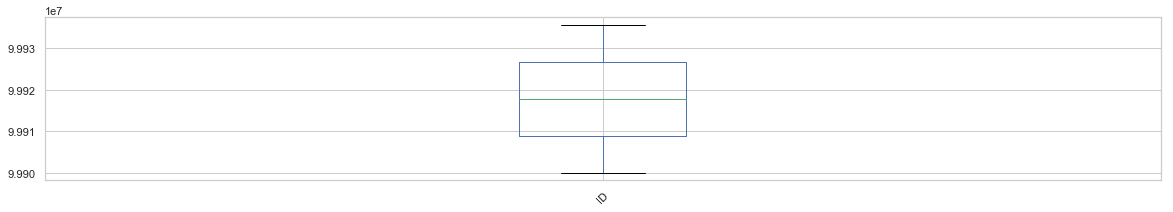

In [37]:
df_Surveydata_test.boxplot(figsize=(20,3))
plt.xticks(rotation=45)
plt.show()

In [38]:
df_Surveydata_test.isnull().sum()

ID                            0
Seat_comfort                 22
Seat_Class                    0
Arrival_time_convenient    3325
Catering                   3357
Platform_location            12
Onboardwifi_service          12
Onboard_entertainment         8
Online_support               26
Onlinebooking_Ease           18
Onboard_service            2872
Leg_room                     25
Baggage_handling             40
Checkin_service              22
Cleanliness                   2
Online_boarding               2
dtype: int64

In [39]:
for column in df_Surveydata_test:
    if df_Surveydata_test[column].dtype == 'object':
        if df_Surveydata_test[column].isnull().any():
#             if(column in cateogry_columns):
                df_Surveydata_test[column]=df_Surveydata_test[column].fillna(df_Surveydata_test[column].mode()[0])
df_Surveydata_test.isnull().sum()

ID                         0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
dtype: int64

In [40]:
for column in df_Surveydata_test.columns:
    if df_Surveydata_test[column].dtype == 'object':
        print(column.upper(),': ',df_Surveydata_test[column].nunique())
        print(df_Surveydata_test[column].value_counts().sort_values())
        print('\n')

SEAT_COMFORT :  6
extremely poor      1329
excellent           4854
poor                5755
good                7808
need improvement    7831
acceptable          8025
Name: Seat_comfort, dtype: int64


SEAT_CLASS :  2
Green Car    17742
Ordinary     17860
Name: Seat_Class, dtype: int64


ARRIVAL_TIME_CONVENIENT :  6
extremely poor       1668
poor                 5131
need improvement     5684
acceptable           5844
excellent            6589
good                10686
Name: Arrival_time_convenient, dtype: int64


CATERING :  6
extremely poor       1507
excellent            5025
poor                 5178
need improvement     6701
good                 6701
acceptable          10490
Name: Catering, dtype: int64


PLATFORM_LOCATION :  5
very convinient     5211
Inconvinient        6134
need improvement    6703
Convinient          8178
manageable          9376
Name: Platform_location, dtype: int64


ONBOARDWIFI_SERVICE :  6
extremely poor        41
poor                3980
need improvemen

In [41]:
df_Surveydata_train = df_Surveydata_train.drop(columns=['ID'], axis=1)
df_train_data = pd.concat([df_Traveldata_train,df_Surveydata_train],axis=1)
df_train_data.shape

(94379, 25)

In [42]:
test_file_ids = df_Surveydata_test['ID']
df_Surveydata_test = df_Surveydata_test.drop(columns=['ID'], axis=1)
df_test_data = pd.concat([df_Traveldata_test,df_Surveydata_test],axis=1)
df_test_data.shape

(35602, 24)

In [43]:
df_train_data.columns

Index(['ID', 'Gender', 'CustomerType', 'Age', 'TypeTravel', 'Travel_Class',
       'Travel_Distance', 'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins',
       'Overall_Experience', 'Seat_comfort', 'Seat_Class',
       'Arrival_time_convenient', 'Catering', 'Platform_location',
       'Onboardwifi_service', 'Onboard_entertainment', 'Online_support',
       'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding'],
      dtype='object')

In [44]:
df_cat_train = df_train_data.select_dtypes(include = ['object'])
df_num_train = df_train_data.select_dtypes(include = ['float64','int64'])

In [45]:
df_cat_test = df_test_data.select_dtypes(include = ['object'])
df_num_test = df_test_data.select_dtypes(include = ['float64','int64'])

In [46]:
df_cat_train = pd.get_dummies(df_cat_train, drop_first = True)
df_cat_train.head()

,Gender_Male,CustomerType_disloyal Customer,TypeTravel_Personal Travel,Travel_Class_Economy,Seat_comfort_excellent,Seat_comfort_extremely poor,Seat_comfort_good,Seat_comfort_need improvement,Seat_comfort_poor,Seat_Class_Ordinary,...,Checkin_service_poor,Cleanliness_excellent,Cleanliness_good,Cleanliness_need improvement,Cleanliness_poor,Online_boarding_excellent,Online_boarding_extremely poor,Online_boarding_good,Online_boarding_need improvement,Online_boarding_poor
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,1,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [47]:
df_cat_test = pd.get_dummies(df_cat_test, drop_first = True)
df_cat_test.head()

,Gender_Male,CustomerType_disloyal Customer,TypeTravel_Personal Travel,Travel_Class_Economy,Seat_comfort_excellent,Seat_comfort_extremely poor,Seat_comfort_good,Seat_comfort_need improvement,Seat_comfort_poor,Seat_Class_Ordinary,...,Checkin_service_poor,Cleanliness_excellent,Cleanliness_good,Cleanliness_need improvement,Cleanliness_poor,Online_boarding_excellent,Online_boarding_extremely poor,Online_boarding_good,Online_boarding_need improvement,Online_boarding_poor
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [48]:
df_train = pd.concat([df_cat_train,df_num_train],axis=1)
df_train.head()

,Gender_Male,CustomerType_disloyal Customer,TypeTravel_Personal Travel,Travel_Class_Economy,Seat_comfort_excellent,Seat_comfort_extremely poor,Seat_comfort_good,Seat_comfort_need improvement,Seat_comfort_poor,Seat_Class_Ordinary,...,Online_boarding_extremely poor,Online_boarding_good,Online_boarding_need improvement,Online_boarding_poor,ID,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,98800001,52.0,272,0.0,5.0,0
1,1,0,1,1,0,0,0,0,1,1,...,0,1,0,0,98800002,48.0,2200,9.0,0.0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,98800003,43.0,1061,77.0,119.0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,98800004,44.0,780,13.0,18.0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,98800005,50.0,1981,0.0,0.0,1


In [49]:
df_test = pd.concat([df_cat_test,df_num_test],axis=1)
df_test.shape

(35602, 74)

In [50]:
df_train.shape

(94379, 75)

In [51]:
x = df_train.drop('Overall_Experience', axis=1)

y = df_train['Overall_Experience']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=42,stratify=y)
x_train.shape

(75503, 74)

### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l1', solver='liblinear', tol=0.000001,n_jobs=-1)

In [54]:
model.fit(x_train, y_train)

C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs))
C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LogisticRegression(n_jobs=-1, penalty='l1', solver='liblinear', tol=1e-06)

In [55]:
ytrain_predict = model.predict(x_train)
ytest_predict = model.predict(x_test)
ytrain_predict

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [56]:
Logistic_Regression_accuracy = model.score(x_test, y_test)
Logistic_Regression_accuracy

0.9007734689552871

In [57]:
print(classification_report(y_test, ytest_predict),'\n')

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      8557
           1       0.92      0.90      0.91     10319

    accuracy                           0.90     18876
   macro avg       0.90      0.90      0.90     18876
weighted avg       0.90      0.90      0.90     18876
 



In [58]:
resultsDf = pd.DataFrame({'Accuracy':Logistic_Regression_accuracy},index=['Logistic Regression'])
resultsDf

,Accuracy
Logistic Regression,0.900773


### Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [417]:
dt_model = DecisionTreeClassifier(random_state=42)

In [409]:
dt_model = DecisionTreeClassifier(criterion = 'gini',max_depth= 110,max_features=50, min_samples_leaf= 110,min_samples_split= 150,random_state=15)

In [418]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [419]:
ytrain_predict = dt_model.predict(x_train)
ytest_predict = dt_model.predict(x_test)
ytrain_predict

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [420]:
Decision_tree_accuracy = dt_model.score(x_test, y_test)
Decision_tree_accuracy

0.9307056579783852

In [64]:
print(classification_report(y_test, ytest_predict),'\n')

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      8557
           1       0.93      0.91      0.92     10319

    accuracy                           0.91     18876
   macro avg       0.91      0.91      0.91     18876
weighted avg       0.91      0.91      0.91     18876
 



In [65]:
resultsDf_1 = pd.DataFrame({'Accuracy':Decision_tree_accuracy},index=['Decision Tree'])
resultsDf_1

,Accuracy
Decision Tree,0.912587


In [66]:
resultsDf = pd.concat([resultsDf,resultsDf_1])
resultsDf

,Accuracy
Logistic Regression,0.900773
Decision Tree,0.912587


### Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

param_grid_RF = {
    'max_depth': [150,175,200],
    'max_features': [40,50,60],
    'min_samples_leaf': [100,150,200],
    'min_samples_split': [100,150,200],
    'n_estimators': [50,70] 
}

rfcl = RandomForestClassifier(random_state=42)

rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_RF, cv = 3)
rfcl = rfcl.fit(x_train, y_train)

rfcl.best_params_

rfcl = rfcl.best_estimator_

In [425]:
resultsDf_6 = pd.DataFrame({'no':[],'Accuracy': []})
resultsDf_6

,no,Accuracy


In [429]:
for i in range(0,1000):
    rfcl = RandomForestClassifier(random_state=i) 
    rfcl = rfcl.fit(x_train, y_train)
    ytrain_predict = rfcl.predict(x_train)
    ytest_predict = rfcl.predict(x_test)
    rfcl_accuracy = rfcl.score(x_test, y_test)
    print(i,"-----",rfcl_accuracy)
    resultsDf_6 = resultsDf_6.append({'no':i,'Accuracy':rfcl_accuracy}, ignore_index=True)
resultsDf_6

0 ----- 0.9477113795295613
1 ----- 0.947499470226743
2 ----- 0.9477643568552659
3 ----- 0.9482411527866074
4 ----- 0.9465988556897648
5 ----- 0.946969696969697
6 ----- 0.9487179487179487
7 ----- 0.9471286289468107
8 ----- 0.9482941301123119
9 ----- 0.9481351981351981
10 ----- 0.9487709260436533
11 ----- 0.9478173341809706
12 ----- 0.9471816062725154
13 ----- 0.9493006993006993
14 ----- 0.9468637423182877
15 ----- 0.9477643568552659
16 ----- 0.9479762661580844
17 ----- 0.9482411527866074
18 ----- 0.947499470226743
19 ----- 0.9477113795295613
20 ----- 0.9479762661580844
21 ----- 0.9476054248781521
22 ----- 0.9479762661580844
23 ----- 0.9476584022038568
24 ----- 0.9493006993006993
25 ----- 0.9483471074380165
26 ----- 0.9473405382496292
27 ----- 0.9484530620894257
28 ----- 0.948823903369358
29 ----- 0.9487179487179487
30 ----- 0.9482411527866074
31 ----- 0.9477113795295613
32 ----- 0.9486119940665395
33 ----- 0.9481351981351981
34 ----- 0.9480292434837889
35 ----- 0.9466518330154694
36 ---

288 ----- 0.946969696969697
289 ----- 0.9489828353464718
290 ----- 0.9486649713922441
291 ----- 0.9477643568552659
292 ----- 0.9484000847637212
293 ----- 0.9475524475524476
294 ----- 0.9477643568552659
295 ----- 0.948823903369358
296 ----- 0.9482411527866074
297 ----- 0.9479762661580844
298 ----- 0.9479232888323798
299 ----- 0.9486119940665395
300 ----- 0.9494596312778131
301 ----- 0.9477113795295613
302 ----- 0.9486649713922441
303 ----- 0.9494596312778131
304 ----- 0.9488768806950625
305 ----- 0.9477113795295613
306 ----- 0.9484000847637212
307 ----- 0.9466518330154694
308 ----- 0.9480292434837889
309 ----- 0.9480292434837889
310 ----- 0.9479762661580844
311 ----- 0.9484000847637212
312 ----- 0.9471816062725154
313 ----- 0.9482941301123119
314 ----- 0.9470226742954015
315 ----- 0.9480822208094936
316 ----- 0.9479232888323798
317 ----- 0.9485590167408349
318 ----- 0.9479762661580844
319 ----- 0.9472875609239245
320 ----- 0.9480822208094936
321 ----- 0.9477113795295613
322 ----- 0.9486

572 ----- 0.9473935155753338
573 ----- 0.9478703115066751
574 ----- 0.9485590167408349
575 ----- 0.9473405382496292
576 ----- 0.9481881754609027
577 ----- 0.9480292434837889
578 ----- 0.9479762661580844
579 ----- 0.9484000847637212
580 ----- 0.9477643568552659
581 ----- 0.9478173341809706
582 ----- 0.9485590167408349
583 ----- 0.9479762661580844
584 ----- 0.9470226742954015
585 ----- 0.9477643568552659
586 ----- 0.948823903369358
587 ----- 0.9488768806950625
588 ----- 0.9481881754609027
589 ----- 0.9492477219749947
590 ----- 0.9482411527866074
591 ----- 0.9472875609239245
592 ----- 0.94723458359822
593 ----- 0.9481881754609027
594 ----- 0.94723458359822
595 ----- 0.9491417673235855
596 ----- 0.9479762661580844
597 ----- 0.9494066539521085
598 ----- 0.9490358126721763
599 ----- 0.9480822208094936
600 ----- 0.9471816062725154
601 ----- 0.9478703115066751
602 ----- 0.9463339690612418
603 ----- 0.9493536766264039
604 ----- 0.9479762661580844
605 ----- 0.9481881754609027
606 ----- 0.9492477

856 ----- 0.9482411527866074
857 ----- 0.9465458783640602
858 ----- 0.9462809917355371
859 ----- 0.9486649713922441
860 ----- 0.9478703115066751
861 ----- 0.9471286289468107
862 ----- 0.9473935155753338
863 ----- 0.9466518330154694
864 ----- 0.947499470226743
865 ----- 0.9482941301123119
866 ----- 0.9484000847637212
867 ----- 0.9479232888323798
868 ----- 0.9483471074380165
869 ----- 0.9482941301123119
870 ----- 0.9467577876668786
871 ----- 0.9484530620894257
872 ----- 0.9490358126721763
873 ----- 0.9481881754609027
874 ----- 0.9486649713922441
875 ----- 0.9476584022038568
876 ----- 0.9483471074380165
877 ----- 0.947499470226743
878 ----- 0.9477643568552659
879 ----- 0.9484530620894257
880 ----- 0.9481881754609027
881 ----- 0.9476054248781521
882 ----- 0.9483471074380165
883 ----- 0.9486119940665395
884 ----- 0.9484530620894257
885 ----- 0.946969696969697
886 ----- 0.9475524475524476
887 ----- 0.9474464929010383
888 ----- 0.9490358126721763
889 ----- 0.9480822208094936
890 ----- 0.94776

,no,Accuracy
0,0.0,0.947711
1,1.0,0.947499
2,2.0,0.947764
3,3.0,0.948241
4,4.0,0.946599
5,5.0,0.946970
6,6.0,0.948718
7,7.0,0.947129
8,8.0,0.948294
9,9.0,0.948135


In [455]:
resultsDf_6.sort_values(by='Accuracy',ascending=False).head(10)

,no,Accuracy
455,455.0,0.950413
122,122.0,0.950042
523,523.0,0.949936
393,393.0,0.949725
166,166.0,0.949725
477,477.0,0.949725
150,150.0,0.949672
811,811.0,0.949619
994,994.0,0.949619
730,730.0,0.949566


In [456]:
rfcl = RandomForestClassifier(random_state=994) 
rfcl = rfcl.fit(x_train, y_train)
ytrain_predict = rfcl.predict(x_train)
ytest_predict = rfcl.predict(x_test)
rfcl_accuracy = rfcl.score(x_test, y_test)
rfcl_accuracy

0.9496185632549269

In [436]:
ytrain_predict = rfcl.predict(x_train)
ytest_predict = rfcl.predict(x_test)
ytrain_predict

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [423]:
rfcl_accuracy = rfcl.score(x_test, y_test)
rfcl_accuracy

0.9484530620894257

rfcl_accuracy = rfcl.score(x_test, y_test)
rfcl_accuracy

In [457]:
resultsDf_1 = pd.DataFrame({'Accuracy':rfcl_accuracy},index=['Random Forest'])
resultsDf_1

,Accuracy
Random Forest,0.949619


rfcl = RandomForestClassifier(n_estimators = 101,max_depth = 200, max_features = 35,min_samples_leaf = 100, min_samples_split= 150)
rfcl = rfcl.fit(x_train, y_train)

rfcl = RandomForestClassifier(n_estimators = 60,max_depth = 150, max_features = 50,min_samples_leaf = 100, min_samples_split= 150)
rfcl = rfcl.fit(x_train, y_train)

rfcl = RandomForestClassifier(n_estimators = 70,max_depth = 140, max_features = 50,min_samples_leaf = 100, min_samples_split= 150) 
rfcl = rfcl.fit(x_train, y_train)

rfcl = RandomForestClassifier(n_estimators = 75,max_depth = 140, max_features = 50,min_samples_leaf = 100, min_samples_split= 150,random_state=20) 
rfcl = rfcl.fit(x_train, y_train)

rfcl = RandomForestClassifier(n_estimators = 75,max_depth = 140, max_features = 50,min_samples_leaf = 100, min_samples_split= 155,random_state=20) 
rfcl = rfcl.fit(x_train, y_train)

rfcl = RandomForestClassifier(n_estimators = 100,max_depth = 200, max_features = 50,min_samples_leaf = 100, min_samples_split= 155,random_state=20, cv=5) 
rfcl = rfcl.fit(x_train, y_train)

rfcl = RandomForestClassifier(n_estimators = 110,max_depth = 200, max_features = 50,min_samples_leaf = 100, min_samples_split= 150,random_state=20, max_leaf_nodes=100,oob_score=False,n_jobs=5) 
rfcl = rfcl.fit(x_train, y_train)

In [72]:
resultsDf = pd.concat([resultsDf,resultsDf_1])
resultsDf

,Accuracy
Logistic Regression,0.900773
Decision Tree,0.912587
Random Forest,0.922971


In [458]:
final_predictions = rfcl.predict(df_test)
submission=pd.DataFrame([test_file_ids,final_predictions]).T
submission.rename(columns={"Unnamed 0": "Overall_Experience"},inplace=True)
submission.to_csv('submission.csv',index = False)